## Classification Trees

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
! python -m pip install pydotplus
! pip install graphviz
import statistics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [2]:
pathways = pd.read_csv('KEGG_7pathways_steps.csv')
pathways = pathways.drop(['Unnamed: 0'], axis=1)
pathways.set_index('studyID', inplace = True)
pathways.head()

,Group,Age,Gender,BMI,Weight_loss_band,Steps,path:hsa03040-mean,path:hsa03040-variance,path:hsa03050-mean,path:hsa03050-variance,path:hsa03060-mean,path:hsa03060-variance,path:hsa04130-mean,path:hsa04130-variance,path:hsa04141-mean,path:hsa04141-variance,path:hsa04662-mean,path:hsa04662-variance,path:hsa05220-mean,path:hsa05220-variance
studyID,,,,,,,,,,,,,,,,,,,,
2001,0,28,0,36.24,1,10723.455560,86.154219,21800.778330,79.794511,7178.102233,72.230671,3886.474530,50.664777,1633.094649,98.424988,49954.700680,159.915149,37825.957920,107.235180,21103.621460
2002,1,38,1,35.71,0,4654.916667,97.584318,15007.706570,68.788322,3862.390316,101.742322,5646.975137,43.465865,1679.074231,84.057955,15199.893980,102.296825,9691.314802,73.110464,5785.362121
2003,0,26,1,42.80,0,5675.133333,95.057381,12617.681560,68.462327,3563.701033,102.477762,11260.700280,49.024537,1575.377166,82.168618,11999.813860,106.311380,13742.844300,74.360748,5684.006951
2004,1,60,0,26.72,1,9855.843373,88.907581,18117.487590,82.024351,7074.260758,82.144727,4236.446791,48.366668,2024.659491,97.786337,50042.642200,127.510289,20393.076990,87.864261,10414.037840
2006,1,48,1,43.89,0,7595.388889,84.981499,9910.820112,79.067493,6394.689793,96.999589,9473.002696,48.343406,1081.223172,75.811154,9582.504013,129.117374,18994.681880,80.114105,6362.957057


In [3]:
steps = pathways.drop(['path:hsa03040-mean',
       'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance', 'path:hsa04130-mean',
       'path:hsa04130-variance', 'path:hsa04141-mean',
       'path:hsa04141-variance', 'path:hsa04662-mean',
       'path:hsa04662-variance', 'path:hsa05220-mean',
       'path:hsa05220-variance'], axis=1)
steps.head()

,Group,Age,Gender,BMI,Weight_loss_band,Steps
studyID,,,,,,
2001,0,28,0,36.24,1,10723.455560
2002,1,38,1,35.71,0,4654.916667
2003,0,26,1,42.80,0,5675.133333
2004,1,60,0,26.72,1,9855.843373
2006,1,48,1,43.89,0,7595.388889


In [4]:
pcs = pd.read_csv('PC_final result(use in modeling) (1).csv')
pcs = pcs.iloc[:,:6]
pcs.set_index('studyID',inplace = True)
pathways_2 = pd.read_csv('KEGG_7pathways_steps.csv')
pathways_2 = pathways_2.drop(['Unnamed: 0', 'Group', 'Age', 
       'path:hsa03040-mean',
       'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance', 'path:hsa04130-mean',
       'path:hsa04130-variance', 'path:hsa04141-mean',
       'path:hsa04141-variance', 'path:hsa04662-mean',
       'path:hsa04662-variance', 'path:hsa05220-mean',
       'path:hsa05220-variance'], axis=1)
pathways_2.set_index('studyID', inplace = True)
pcs = pcs.merge(pathways_2, how = 'outer', on ='studyID')
pcs.head()

,PC1,PC2,PC3,PC4,PC5,Gender,BMI,Weight_loss_band,Steps
studyID,,,,,,,,,
2001,8.061646,-5.761836,-4.841193,-2.171323,-2.788218,0,36.24,1,10723.455560
2002,8.430937,6.946562,1.794457,-0.015105,-3.024961,1,35.71,0,4654.916667
2003,8.256683,8.288072,2.570019,-0.302641,-3.554665,1,42.80,0,5675.133333
2004,8.376866,-0.916554,-6.212482,1.182002,-0.328640,0,26.72,1,9855.843373
2006,8.258802,0.870977,4.219331,0.654543,-3.580225,1,43.89,0,7595.388889


## Demographics

In [5]:
demographics = pathways.drop(['Steps','path:hsa03040-mean',
       'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance', 'path:hsa04130-mean',
       'path:hsa04130-variance', 'path:hsa04141-mean',
       'path:hsa04141-variance', 'path:hsa04662-mean',
       'path:hsa04662-variance', 'path:hsa05220-mean',
       'path:hsa05220-variance'], axis = 1)


In [6]:
demographics.head()

,Group,Age,Gender,BMI,Weight_loss_band
studyID,,,,,
2001,0,28,0,36.24,1
2002,1,38,1,35.71,0
2003,0,26,1,42.80,0
2004,1,60,0,26.72,1
2006,1,48,1,43.89,0


First let's do some hyperparameter tuning, by  exhaustive grid search

In [7]:
param_grid = {'criterion': ['gini','entropy'],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [8]:
X_dem = demographics[['Group', 'Age', 'Gender', 'BMI']]
Y_dem = demographics['Weight_loss_band']                  
X_train_dem, X_test_dem, y_train_dem, y_test_dem = train_test_split(X_dem,Y_dem, test_size = 0.3, random_state=42)

In [9]:
classifier = DecisionTreeClassifier()
clas_grid = GridSearchCV(classifier, param_grid, cv=5)
clas_grid.fit(X_train_dem, y_train_dem)
clas_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

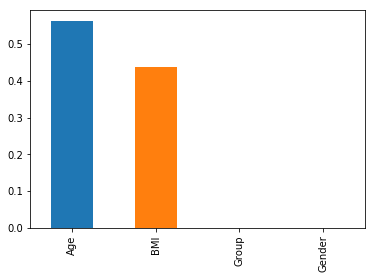

In [10]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=None,
           max_leaf_nodes=20, min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')
classifier.fit(X_train_dem,y_train_dem)
y_pred_clas = classifier.predict(X_test_dem)
feat_importances = pd.Series(classifier.feature_importances_, index=X_dem.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

If you want to display the tree un-comment this code (Only runs on mac contact me for Windows)

In [66]:
# export_graphviz(classifier, out_file='demographics.dot',
#                 feature_names = X_dem.columns,
        
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)
# call(['dot', '-Tpng', 'demographics.dot', '-o', 'demographics.png', '-Gdpi=600'])
# Image(filename = 'demographics.png')

Random States from 1 to 300

In [15]:
random_state = list(range(1,300))
#print(random_state)
d1_train_acc = []
d1_test_acc = []
d1_auc_score = []
precision = []
f1_hi=[]
d1_prec_score = []
d1_recall_score = []

for i in random_state :
    
    X_dem = demographics[['Group', 'Age', 'Gender', 'BMI']]
    Y_dem = demographics['Weight_loss_band']
    
    X_train, X_test, y_train, y_test= train_test_split(X_dem,Y_dem, test_size = 0.3, random_state = i) 
    
    clf = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test) 

    train_acc = clf.score(X_train, y_train)
    test_acc = accuracy_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    f1_score_pred = f1_score(y_test,y_pred)
    prec_score = average_precision_score(y_test, y_pred)
    rec_score = recall_score(y_test,y_pred)

    
    d1_train_acc.append(train_acc)
    d1_test_acc.append(test_acc)
    d1_auc_score.append(auc_score)
    precision.append(average_precision)
    f1_hi.append(f1_score_pred)
    d1_prec_score.append(prec_score)
    d1_recall_score.append(rec_score)


print('Mean Training Accuracy:', np.mean(d1_train_acc)) 
print('Mean Test Accuracy:', np.mean(d1_test_acc))
print('Standard Deviation for test accuracy',statistics.stdev(d1_test_acc))
print('AUC score equals',np.mean(d1_auc_score))
print('Standard Deviation for auc score',statistics.stdev(d1_auc_score))
print('Precision Score', np.mean(precision))
print('F1', np.mean(f1_hi))
print('Average precision score:', np.mean(d1_prec_score))
print('Average recall score', np.mean(d1_recall_score))

Mean Training Accuracy: 0.7911842895120487
Mean Test Accuracy: 0.6153846153846154
Standard Deviation for test accuracy 0.11001221731185196
AUC score equals 0.5815227136297371
Standard Deviation for auc score 0.11845534317652652
Precision Score 0.40081401580454795
F1 0.38570086466221154
Average precision score: 0.40081401580454795
Average recall score 0.4467988533205925


In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5, 4],
       [4, 4]])

3 Fold Cross Validation

In [23]:
scores = cross_val_score(clf,X_train,y_train, cv=3)
scores               
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

lb = LabelBinarizer()
y_train = np.array([number[0] for number in lb.fit_transform(y_train)])

recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall')
print('Recall', np.mean(recall), recall.std())
precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision')
print('Precision', np.mean(precision), precision.std())
f1 = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1), 'std',f1.std())


Accuracy: 0.72 (+/- 0.05)
Recall 0.0 0.0
Precision 0.0 0.0
F1 0.0 std 0.0


## Step counts

In [24]:
X_steps = steps[['Group', 'Age', 'Gender', 'BMI','Steps']]
Y_steps = steps['Weight_loss_band']                  
X_train, X_test, y_train, y_test = train_test_split(X_steps,Y_steps, test_size = 0.3, random_state=42)

In [93]:
classifier = DecisionTreeClassifier()
clas_grid = GridSearchCV(classifier, param_grid, cv=5)
clas_grid.fit(X_train, y_train)
clas_grid.best_estimator_

/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

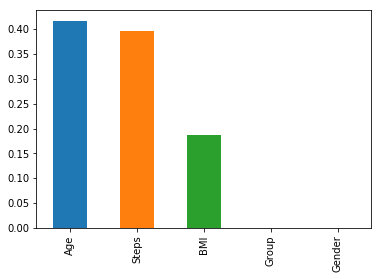

In [94]:
classifier = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train,y_train)
y_pred_clas = classifier.predict(X_test)
feat_importances = pd.Series(classifier.feature_importances_, index=X_steps.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [25]:
random_state = list(range(1,300))
#print(random_state)
d1_train_acc = []
d1_test_acc = []
d1_auc_score = []
precision = []
f1_hi=[]
d1_prec_score = []
d1_recall_score = []

for i in random_state :
    
    X_steps = steps[['Group', 'Age', 'Gender', 'BMI','Steps']]
    Y_steps = steps['Weight_loss_band']
    
    X_train, X_test, y_train, y_test= train_test_split(X_steps,Y_steps, test_size = 0.3, random_state = i) 
    
    clf = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test) 

    train_acc = clf.score(X_train, y_train)
    test_acc = accuracy_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    f1_score_pred = f1_score(y_test,y_pred)
    prec_score = average_precision_score(y_test, y_pred)
    rec_score = recall_score(y_test,y_pred)

    d1_train_acc.append(train_acc)
    d1_test_acc.append(test_acc)
    d1_auc_score.append(auc_score)
    precision.append(average_precision)
    f1_hi.append(f1_score_pred)
    d1_prec_score.append(prec_score)
    d1_recall_score.append(rec_score)


print('Mean Training Accuracy:', np.mean(d1_train_acc)) 
print('Mean Test Accuracy:', np.mean(d1_test_acc))
print('Standard Deviation for test accuracy',statistics.stdev(d1_test_acc))

print('AUC score equals',np.mean(d1_auc_score))
print('Standard Deviation for auc score',statistics.stdev(d1_auc_score))
print('Precision Score', np.mean(precision))
print('F1', np.mean(f1_hi))
print('Average precision score:', np.mean(d1_prec_score))
print('Average recall score', np.mean(d1_recall_score))

Mean Training Accuracy: 0.8701655089614956
Mean Test Accuracy: 0.6118433995671847
Standard Deviation for test accuracy 0.11754039108696746
AUC score equals 0.553222242269065
Standard Deviation for auc score 0.11875919202060295
Precision Score 0.3937810495079473
F1 0.34499385514042213
Average precision score: 0.3937810495079473
Average recall score 0.35195625630408234


3 Fold Cross Validation

In [96]:
scores = cross_val_score(clf,X_train,y_train, cv=3)
scores               
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.74 (+/- 0.20)


In [97]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7, 2],
       [7, 1]])

## Pathways

In [26]:
X_pa = pathways[['Group', 'Age', 'Gender', 'BMI', 'Steps',
       'path:hsa03040-mean', 'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance', 'path:hsa04130-mean',
       'path:hsa04130-variance', 'path:hsa04141-mean',
       'path:hsa04141-variance', 'path:hsa04662-mean',
       'path:hsa04662-variance', 'path:hsa05220-mean',
       'path:hsa05220-variance']]
Y_pa =pathways['Weight_loss_band']                  
X_train, X_test, y_train, y_test = train_test_split(X_pa,Y_pa, test_size = 0.2, random_state=42)

In [99]:
classifier = DecisionTreeClassifier()
clas_grid = GridSearchCV(classifier, param_grid, cv=5)
clas_grid.fit(X_train, y_train)
clas_grid.best_estimator_

/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

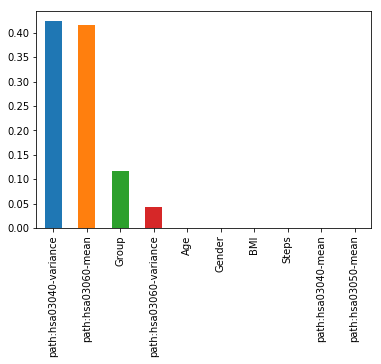

In [100]:
classifier =DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train,y_train)
y_pred_clas = classifier.predict(X_test)
feat_importances = pd.Series(classifier.feature_importances_, index=X_pa.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [27]:
random_state = list(range(1,300))
#print(random_state)
d1_train_acc = []
d1_test_acc = []
d1_auc_score = []
f1_hi=[]
d1_prec_score = []
d1_recall_score = []

for i in random_state :
    
    X_pa = pathways[['Group', 'Age', 'Gender', 'BMI', 'Steps',
       'path:hsa03040-mean', 'path:hsa03040-variance', 'path:hsa03050-mean',
       'path:hsa03050-variance', 'path:hsa03060-mean',
       'path:hsa03060-variance', 'path:hsa04130-mean',
       'path:hsa04130-variance', 'path:hsa04141-mean',
       'path:hsa04141-variance', 'path:hsa04662-mean',
       'path:hsa04662-variance', 'path:hsa05220-mean',
       'path:hsa05220-variance']]
    Y_pa = pathways['Weight_loss_band']
    
    X_train, X_test, y_train, y_test= train_test_split(X_pa,Y_pa, test_size = 0.3, random_state = i) 
    
    clf = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test) 

    train_acc = clf.score(X_train, y_train)
    test_acc = accuracy_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    f1_score_pred = f1_score(y_test,y_pred)
    prec_score = average_precision_score(y_test, y_pred)
    rec_score = recall_score(y_test,y_pred)
    
    d1_train_acc.append(train_acc)
    d1_test_acc.append(test_acc)
    d1_auc_score.append(auc_score)
    f1_hi.append(f1_score_pred)
    d1_prec_score.append(prec_score)
    d1_recall_score.append(rec_score)

print('Mean Training Accuracy:', np.mean(d1_train_acc)) 
print('Mean Test Accuracy:', np.mean(d1_test_acc))
print('Standard Deviation for test accuracy',statistics.stdev(d1_test_acc))

print('AUC score equals',np.mean(d1_auc_score))
print('Standard Deviation for auc score',statistics.stdev(d1_auc_score))
print('F1', np.mean(f1_hi))
print('Average precision score:', np.mean(d1_prec_score))
print('Average recall score', np.mean(d1_recall_score))

Mean Training Accuracy: 0.9318240288139955
Mean Test Accuracy: 0.5660043281526658
Standard Deviation for test accuracy 0.10337280860134347
AUC score equals 0.5173630438680605
Standard Deviation for auc score 0.11615789207830164
F1 0.31948958880345235
Average precision score: 0.36405203391053165
Average recall score 0.34899001964219356


5 fold cross validation

In [28]:
scores = cross_val_score(clf,X_train,y_train, cv=5)
scores               
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.13)


In [29]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.45


In [30]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7, 2],
       [7, 1]])

# Extra Model without some Features

In [31]:
random_state = list(range(1,300))
#print(random_state)
d1_train_acc = []
d1_test_acc = []
d1_auc_score = []
precision = []
f1_hi=[]
d1_prec_score = []
d1_recall_score = []

for i in random_state :
    
    X_pa = pathways[['Group', 'Age', 'Gender', 'BMI', 'Steps','path:hsa03040-variance','path:hsa03060-mean']]
    Y_pa = pathways['Weight_loss_band']
    
    X_train, X_test, y_train, y_test= train_test_split(X_pa,Y_pa, test_size = 0.3, random_state = i) 
    
    clf = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test) 

    train_acc = clf.score(X_train, y_train)
    test_acc = accuracy_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    f1_score_pred = f1_score(y_test,y_pred)
    prec_score = average_precision_score(y_test, y_pred)
    rec_score = recall_score(y_test,y_pred)

    
    d1_train_acc.append(train_acc)
    d1_test_acc.append(test_acc)
    d1_auc_score.append(auc_score)
    f1_hi.append(f1_score_pred)
    d1_prec_score.append(prec_score)
    d1_recall_score.append(rec_score)
    

print('Mean Training Accuracy:', np.mean(d1_train_acc)) 
print('Mean Test Accuracy:', np.mean(d1_test_acc))
print('Standard Deviation for test accuracy',statistics.stdev(d1_test_acc))

print('AUC score equals',np.mean(d1_auc_score))
print('Standard Deviation for auc score',statistics.stdev(d1_auc_score))
print('F1', np.mean(f1_hi))
print('Average precision score:', np.mean(d1_prec_score))
print('Average recall score', np.mean(d1_recall_score))

Mean Training Accuracy: 0.9112426035502958
Mean Test Accuracy: 0.60987605744639
Standard Deviation for test accuracy 0.1026535247045416
AUC score equals 0.5502193922762485
Standard Deviation for auc score 0.1130417734019276
F1 0.34462331556567244
Average precision score: 0.38407788394064424
Average recall score 0.3531016085363911


In [106]:
scores = cross_val_score(clf,X_train,y_train, cv=5)
scores               
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.35)


In [107]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7, 2],
       [5, 3]])

In [108]:
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.52


In [109]:
precision = float(3/(3+2))
print('Precision', precision)
recall = 3/(3+5)
print('Recall', recall)
f1 = 2*(precision*recall)/(precision+recall)
print(f1)

Precision 0.6
Recall 0.375
0.4615384615384615


## PCA

In [32]:
X_pcs= pcs[['PC1', 'PC2', 'PC3', 'PC4', 'PC5','Steps','Gender','BMI']]
Y_pcs = pcs['Weight_loss_band']                
X_train, X_test, y_train, y_test= train_test_split(X_pcs,Y_pcs, test_size = 0.2, random_state = 42)

In [39]:
reg = DecisionTreeClassifier()
reg_grid = GridSearchCV(reg, param_grid, cv=5)
reg_grid.fit(X_train, y_train)
reg_grid.best_estimator_

/Users/marikitamarinaki/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

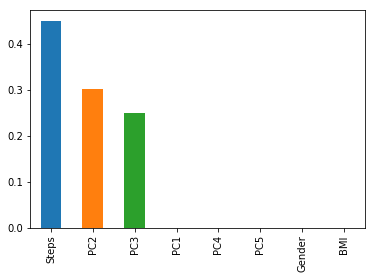

In [42]:
classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False,  splitter='best')
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)
feat_importances = pd.Series(classifier.feature_importances_, index=X_pcs.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [33]:
random_state = list(range(1,300))

d1_train_acc = []
d1_test_acc = []
d1_auc_score = []
f1_hi=[]
d1_prec_score = []
d1_recall_score = []

for i in random_state :
    
    X_pcs= pcs[['PC1', 'PC2', 'PC3', 'PC4', 'PC5','Steps','Gender','BMI']]
    Y_pcs = pcs['Weight_loss_band']
    
    X_train, X_test, y_train, y_test= train_test_split(X_pcs,Y_pcs, test_size = 0.3, random_state = i) 
    
    clf = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test) 

    train_acc = clf.score(X_train, y_train)
    test_acc = accuracy_score(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    f1_score_pred = f1_score(y_test,y_pred)
    prec_score = average_precision_score(y_test, y_pred)
    rec_score = recall_score(y_test,y_pred)
    
    d1_train_acc.append(train_acc)
    d1_test_acc.append(test_acc)
    d1_auc_score.append(auc_score)
    f1_hi.append(f1_score_pred)
    d1_prec_score.append(prec_score)
    d1_recall_score.append(rec_score)
    

print('Mean Training Accuracy:', np.mean(d1_train_acc)) 
print('Mean Test Accuracy:', np.mean(d1_test_acc))
print('Standard Deviation for test accuracy',statistics.stdev(d1_test_acc))

print('AUC score equals',np.mean(d1_auc_score))
print('Standard Deviation for auc score',statistics.stdev(d1_auc_score))
print('F1', np.mean(f1_hi))
print('Average precision score:', np.mean(d1_prec_score))
print('Average recall score', np.mean(d1_recall_score))

Mean Training Accuracy: 0.9278792556384529
Mean Test Accuracy: 0.6293527444422585
Standard Deviation for test accuracy 0.10962110490158418
AUC score equals 0.5869066505772191
Standard Deviation for auc score 0.1318829006400624
F1 0.41071648840165154
Average precision score: 0.4152250226802656
Average recall score 0.43762276370972014


In [44]:
scores = cross_val_score(classifier,X_train,y_train, cv=5)
print(scores)               
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.66666667 0.875      0.75       0.57142857 0.57142857]
Accuracy: 0.69 (+/- 0.23)


In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[7, 2],
       [6, 2]])